Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

# For data augmentation & class imbalance handling
from tensorflow.keras.preprocessing.image import ImageDataGenerator
!pip install Augmentor
import Augmentor

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

from google.colab import drive
drive.mount('/content/gdrive')




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
IMG_SIZE = (180, 180)


Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
  image_size=IMG_SIZE,
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize


for images, labels in train_ds.take(1):
    # Track which classes we've plotted
    plotted_classes = set()

    # Iterate through images in batch
    for i in range(len(images)):
        class_idx = labels[i].numpy()
        class_name = class_names[class_idx]

        # Plot only if we haven't seen this class before
        if class_name not in plotted_classes:
            ax = plt.subplot(3, 3, len(plotted_classes) + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_name)
            plt.axis("off")
            plotted_classes.add(class_name)

            # Stop when all 9 classes are plotted
            if len(plotted_classes) == 9:
                break

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
# Optionally, you can create a separate function for the model
def create_model():
    model = keras.Sequential([
        layers.Rescaling(1./255, input_shape=(180,180,3)),  # Normalize pixel values

        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(),

        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(9, activation='softmax')  # 9 classes
    ])




### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 485s 3s/step - accuracy: 0.0555 - loss: 4.7312 - val_accuracy: 0.0492 - val_loss: 4.0012
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.0525 - loss: 3.7016 - val_accuracy: 0.0492 - val_loss: 4.0012
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0606 - loss: 3.9622 - val_accuracy: 0.0492 - val_loss: 4.0012
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0430 - loss: 4.1229 - val_accuracy: 0.0492 - val_loss: 4.0012
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0500 - loss: 4.0072 - val_accuracy: 0.0492 - val_loss: 4.0012
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0542 - loss: 3.8892 - val_accuracy: 0.0492 - val_loss: 4.0012
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0566 - loss: 3.9120 - val_accuracy: 0.0492 - val_loss: 4.0012
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0505 - loss: 4.0550 - val_accuracy: 0.0492 - 

### Visualizing training results

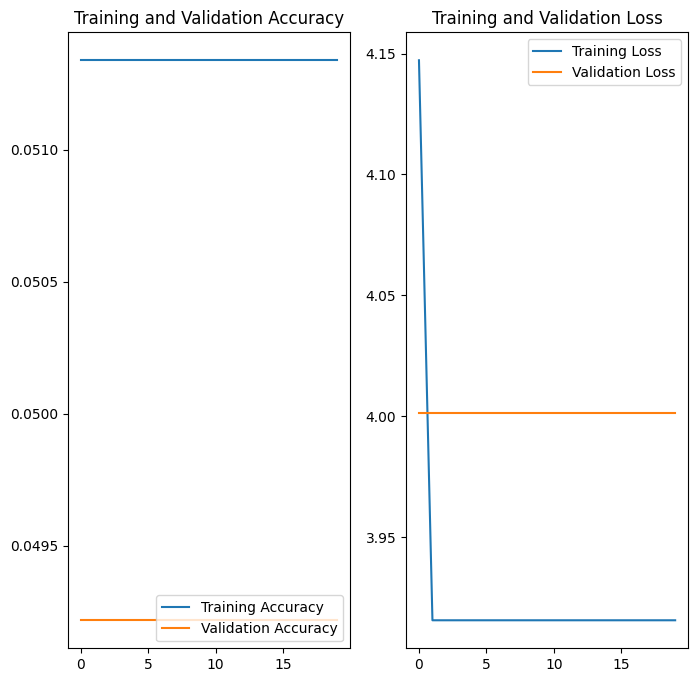

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit  



### Write your findings here  
Training Accuracy jumps almost immediately to a very high value (close to 1.0), while Validation Accuracy remains relatively low (around 0.50).
Training Loss plummets to near-zero, but Validation Loss stays high (around 4.0).

This behavior indicates that your model is severely overfitting:

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),     # Randomly flip images horizontally
    layers.RandomRotation(0.1),          # Rotate images up to ±10%
    layers.RandomZoom(0.1),             # Zoom in or out by up to 10%
    layers.RandomWidth(0.1),            # Randomly change width by ±10%
    layers.RandomHeight(0.1),  ])





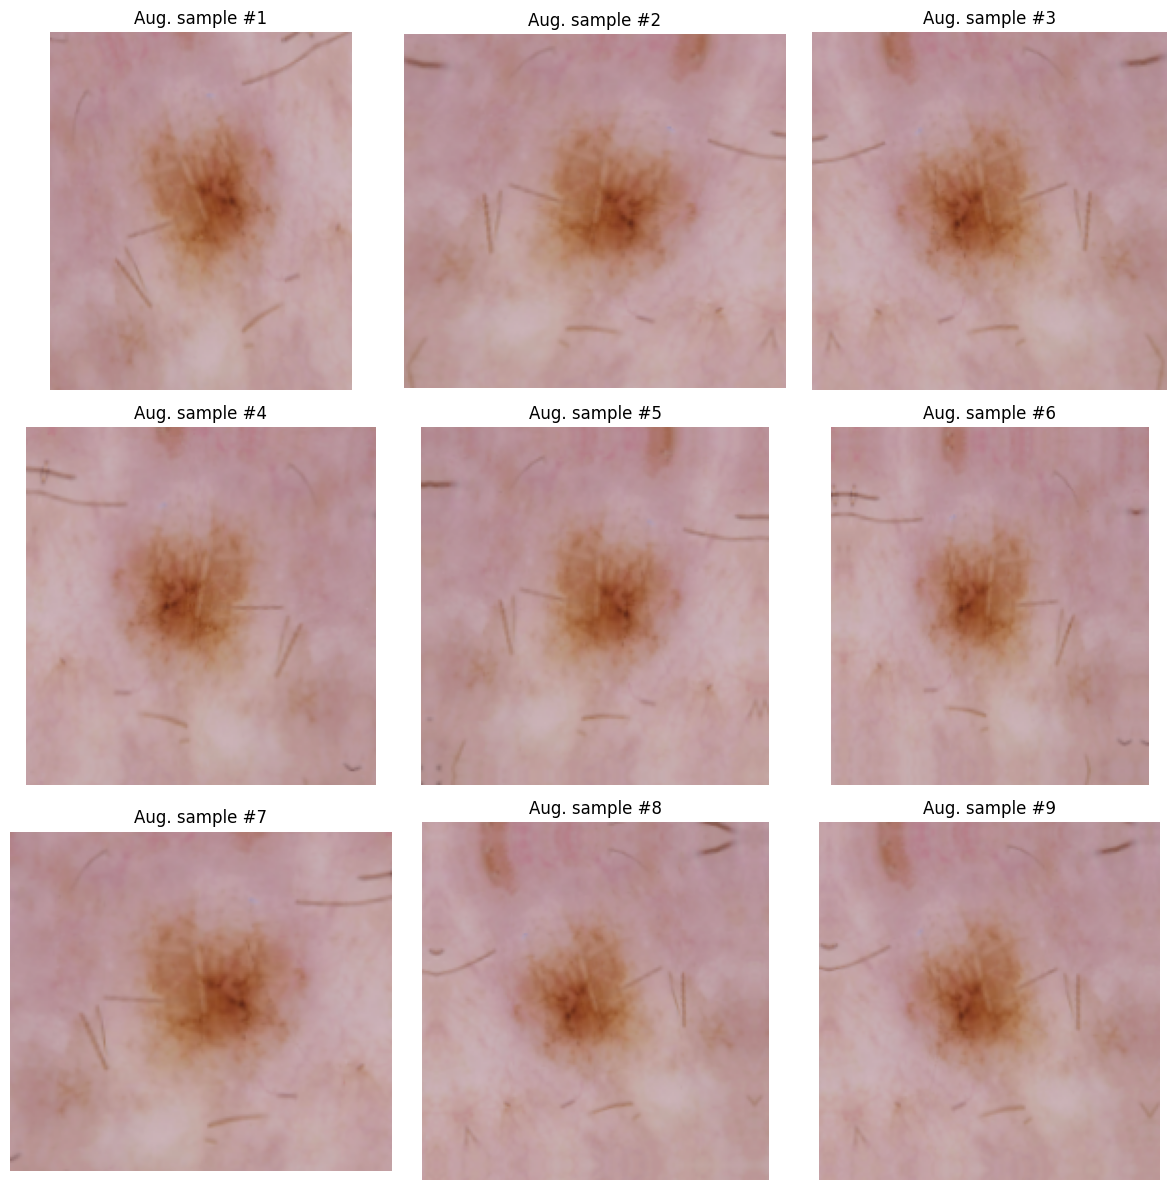

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

for images, labels in train_ds.take(1):
    # Extract a single image from the batch
    original_image = images[0]
    break  # We only need the first image

# Plot multiple augmented versions of this one image
plt.figure(figsize=(12, 12))

for i in range(9):  # show 9 augmented samples
    ax = plt.subplot(3, 3, i+1)
    # Expand dims so that it’s (1, height, width, channels)
    augmented_img = data_augmentation(tf.expand_dims(original_image, 0))
    plt.imshow(augmented_img[0].numpy().astype("uint8"))
    plt.title(f"Aug. sample #{i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here


 model = tf.keras.Sequential([
    data_augmentation,                  # augmentation pipeline
    layers.Rescaling(1./255),           # normalize pixel values
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')  # 9 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


ValueError: Shapes used to initialize variables must be fully-defined (no `None` dimensions). Received: shape=(None, 128) for variable path='sequential_10/dense_14/kernel'

### Compiling the model

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
EPOCHS = 20
history = model.fit(
    train_ds,          # your training dataset
    validation_data=val_ds,  # your validation dataset
    epochs=EPOCHS
)

Epoch 1/20


ValueError: Shapes used to initialize variables must be fully-defined (no `None` dimensions). Received: shape=(None, 128) for variable path='sequential_5/dense_6/kernel'

### Visualizing the results

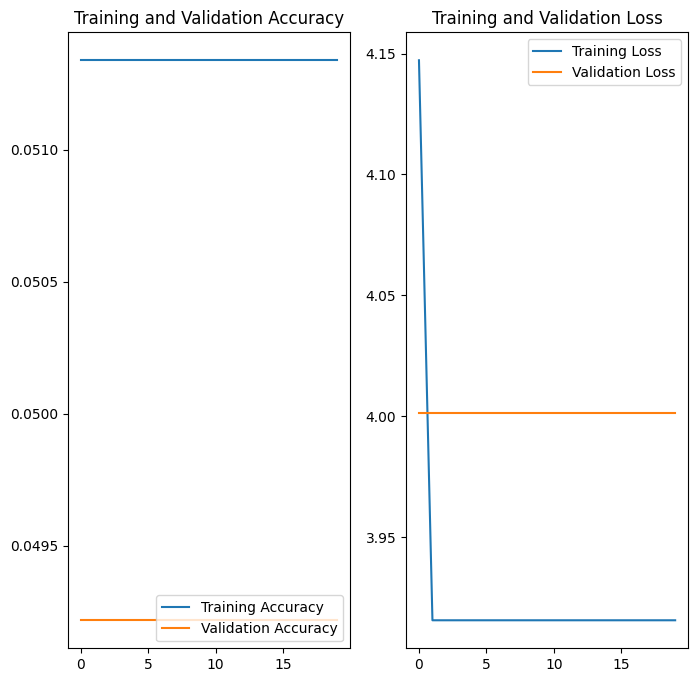

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

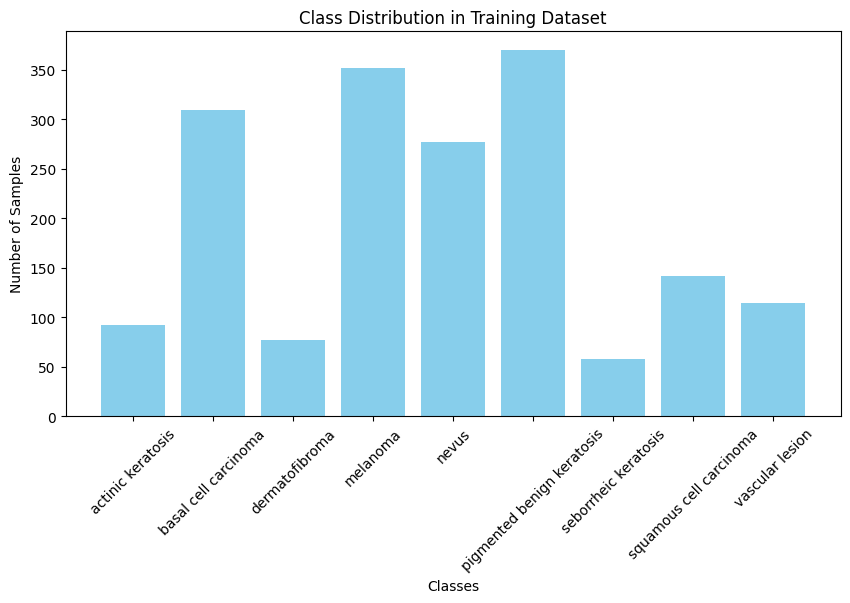

In [ ]:
class_counts = {class_name: 0 for class_name in class_names}

# Iterate through the dataset and count labels
for images, labels in train_ds:
    unique, counts = np.unique(labels.numpy(), return_counts=True)
    for label, count in zip(unique, counts):
        class_counts[class_names[label]] += count

# Plot class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Dataset")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Find the class with the least and most samples
least_class = min(class_counts, key=class_counts.get)
most_class = max(class_counts, key=class_counts.get)

# Sort classes by number of samples (descending)
sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)

# Print results
print(f"Class with the least number of samples: {least_class} ({class_counts[least_class]} samples)")
print(f"Class dominating the dataset: {most_class} ({class_counts[most_class]} samples)")
print("\nTop 3 most frequent classes:")
for cls, count in sorted_classes[:3]:
    print(f"{cls}: {count} samples")

print("\nBottom 3 least frequent classes:")
for cls, count in sorted_classes[-3:]:
    print(f"{cls}: {count} samples")


Class with the least number of samples: seborrheic keratosis (58 samples)
Class dominating the dataset: pigmented benign keratosis (370 samples)

Top 3 most frequent classes:
pigmented benign keratosis: 370 samples
melanoma: 352 samples
basal cell carcinoma: 309 samples

Bottom 3 least frequent classes:
actinic keratosis: 92 samples
dermatofibroma: 77 samples
seborrheic keratosis: 58 samples


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?  
Answer:  seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
answer: pigmented benign keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="To do"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(data_dir_train/i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E55FA7C5A50>: 100%|██████████| 500/500 [00:17<00:00, 28.30 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E55FA78E550>: 100%|██████████| 500/500 [00:19<00:00, 25.68 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E55FA677310>: 100%|██████████| 500/500 [00:18<00:00, 26.67 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E55FA588610>: 100%|██████████| 500/500 [01:19<00:00,  6.26 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7E55FA64FED0>: 100%|██████████| 500/500 [01:09<00:00,  7.18 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E564995A790>: 100%|██████████| 500/500 [00:19<00:00, 25.86 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E55FA7A22D0>: 100%|██████████| 500/500 [00:40<00:00, 12.33 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E56499C6B10>: 100%|██████████| 500/500 [00:18<00:00, 27.68 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E55FA566D50>: 100%|██████████| 500/500 [00:18<00:00, 26.76 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
import glob
import os

path_list = glob.glob(os.path.join(str(data_dir_train), '*', 'output', '*.jpg'))
print(path_list)

['/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0026927.jpg_ae7f66ab-9d4e-4725-ac41-237d5f5f1dfc.jpg', '/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0031043.jpg_050fa13e-5112-4453-8144-06eb091c30aa.jpg', '/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0028224.jpg_7dbf176a-0f17-4ffe-a573-a8fcb6f56be0.jpg', '/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0025712.jpg_19f9a8dd-60c0-459d-9a80-ed914d6884d3.jpg', '/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The Inter

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(str(data_dir_train), '*', 'output', '*.jpg'))]

print(lesion_list_new)

['squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 'squamous cell carcinoma', 

In [ ]:


dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
original_df = pd.DataFrame(columns=['Path', 'Label'])

df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path', 'Label'])


new_df = pd.concat([original_df, df2], ignore_index=True)


print(new_df)

                                                   Path  \
0     /content/gdrive/My Drive/CNN_assignment/Skin c...   
1     /content/gdrive/My Drive/CNN_assignment/Skin c...   
2     /content/gdrive/My Drive/CNN_assignment/Skin c...   
3     /content/gdrive/My Drive/CNN_assignment/Skin c...   
4     /content/gdrive/My Drive/CNN_assignment/Skin c...   
...                                                 ...   
4495  /content/gdrive/My Drive/CNN_assignment/Skin c...   
4496  /content/gdrive/My Drive/CNN_assignment/Skin c...   
4497  /content/gdrive/My Drive/CNN_assignment/Skin c...   
4498  /content/gdrive/My Drive/CNN_assignment/Skin c...   
4499  /content/gdrive/My Drive/CNN_assignment/Skin c...   

                        Label  
0     squamous cell carcinoma  
1     squamous cell carcinoma  
2     squamous cell carcinoma  
3     squamous cell carcinoma  
4     squamous cell carcinoma  
...                       ...  
4495           dermatofibroma  
4496           dermatofibroma  
449

In [ ]:
new_df['Label'].value_counts()

,count
Label,
squamous cell carcinoma,500
melanoma,500
basal cell carcinoma,500
vascular lesion,500
seborrheic keratosis,500
nevus,500
pigmented benign keratosis,500
actinic keratosis,500
dermatofibroma,500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
model = models.Sequential([
    # Normalize the images (scaled to [0, 1])
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten the output for the dense layers
    layers.Flatten(),

    # Dense Layer 1
    layers.Dense(128, activation='relu'),

    # Output Layer (assuming you have 2 classes, change units for more classes)
    layers.Dense(2, activation='softmax')  # Change the number of units based on your class count
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if your labels are one-hot encoded
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:

## Your code goes here, use 50 epochs.
# Set number of epochs
epochs = 50

# Train the model
history = model.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=epochs  # Number of epochs
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 45s 232ms/step - accuracy: 0.1346 - loss: nan - val_accuracy: 0.1151 - val_loss: nan
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 239ms/step - accuracy: 0.1378 - loss: nan - val_accuracy: 0.1151 - val_loss: nan
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 234ms/step - accuracy: 0.1366 - loss: nan - val_accuracy: 0.1151 - val_loss: nan
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 37s 212ms/step - accuracy: 0.1381 - loss: nan - val_accuracy: 0.1151 - val_loss: nan
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 42s 218ms/step - accuracy: 0.1369 - loss: nan - val_accuracy: 0.1151 - val_loss: nan
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 44s 234ms/step - accuracy: 0.1344 - loss: nan - val_accuracy: 0.1151 - val_loss: nan
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 232ms/step - accuracy: 0.1376 - loss: nan - val_accuracy: 0.1151 - val_loss: nan
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 234ms/step - accuracy: 0.1393 - loss: nan - val_accuracy: 0.1151 - val_loss: nan


#### **Todo:**  Visualize the model results

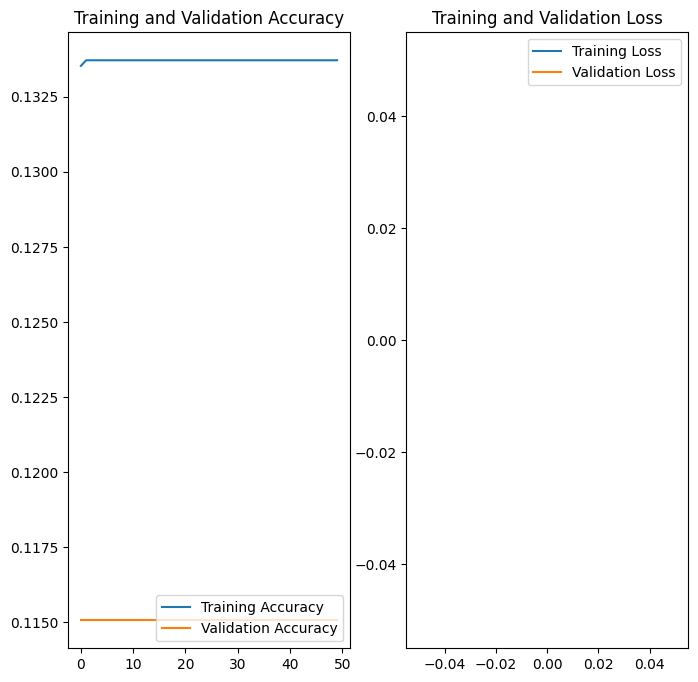

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

 it's clear that underfitting is still a major problem.  The training and validation accuracy are both extremely low and flat, hovering around 0.135. This means the model is not learning the underlying patterns in the data effectively, neither on the training set nor on the validation set.